#Lab 2: Introduction to ScikiLearn and Classification Tasks

During this Lab, we aim to achieve the following:


*   Familiarize with <a href="https://scikit-learn.org/stable/"> scikit-learn </a>, an essential python library in data science;
*   learn how to approach a classification task with scikit-learn.

In this notebook, we learn to use Scikit-Learn with a practical example and then, in the second part, we will test our knowledge by doing some exercises.

# Demonstration

We start by loading some useful libraries, and defining our data

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

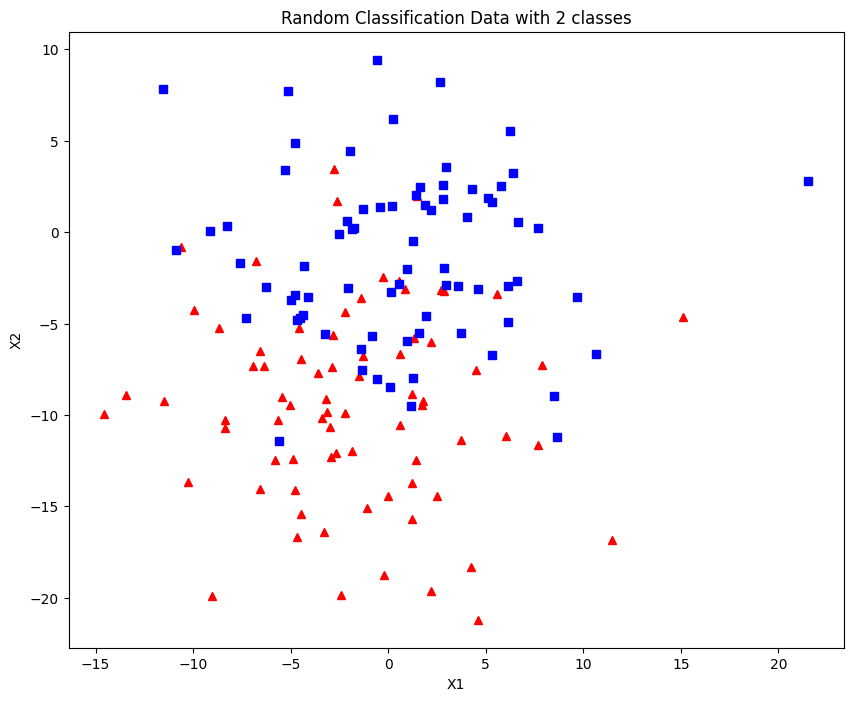

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#dataset
X_toy, y_toy = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=5,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X_toy[:, 0][y_toy == 0], X_toy[:, 1][y_toy == 0], 'r^')
plt.plot(X_toy[:, 0][y_toy == 1], X_toy[:, 1][y_toy == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
#we load a machine learning classifier: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#training a classifier is pretty straight-forward

# 1. Define the classifier istance
clf_knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train over a set of examples
clf_knn.fit(X_toy, y_toy)

# 3. Predict a set of examples (in this case we use the training data, but we can use any kind of data)
y_pred = clf_knn.predict(X_toy)

# 4. We use an evaluaiton function
print(accuracy_score(y_true=y_toy, y_pred = y_pred))

0.8133333333333334


When defining or training a model, we have the so called *hyperparameters*, i.e., different settings to configure for our training strategy.  <br>
The question is: *how can we decide the best configuration setting for the task?* <br>
The answer is the usage of *training* and *validation* partitions. <br>
We can use sklearn to do that: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [ ]:
from sklearn.model_selection import train_test_split

#we first split the training into training + validation set, and then testing set
X_train_val, X_test, y_train_val, y_test = train_test_split(X_toy, y_toy,
                                                  train_size = 0.8, random_state = 123)

# we then compute then split training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  train_size = 0.8, random_state = 123)

print(f"Original size = {X_toy.shape[0]}\tTrain size = {X_train.shape[0]}\tVal size = {X_val.shape[0]}\tTest size = {X_test.shape[0]}")  # alternative way to use the print when there are
                                                                                                          # variables and text to print together

Original size = 150	Train size = 96	Val size = 24	Test size = 30


we can now train our model into the training set, and evaluate it over the testing set

In [ ]:
# we define two models
clf_knn1 = KNeighborsClassifier(n_neighbors=2)
clf_knn2 = KNeighborsClassifier(n_neighbors=5)

#train the models
clf_knn1.fit(X_train, y_train)
clf_knn2.fit(X_train, y_train)

#we pick the best model by observing training and validation sets
y_train_pred_clf1 = clf_knn1.predict(X_train)
y_val_pred_clf1 = clf_knn1.predict(X_val)

y_train_pred_clf2 = clf_knn2.predict(X_train)
y_val_pred_clf2 = clf_knn2.predict(X_val)

print(f"Clf1 --->\t Train = {accuracy_score(y_train, y_train_pred_clf1):.4f}")
print(f"Clf1 --->\t Val = {accuracy_score(y_val, y_val_pred_clf1):.4f}")

print(f"Clf2 --->\t Train = {accuracy_score(y_train, y_train_pred_clf2):.4f}")
print(f"Clf2 --->\t Val = {accuracy_score(y_val, y_val_pred_clf2):.4f}")

#the best classifier is clf1 (based on the validation score)
# we use clf1 for the testing set
y_test_pred = clf_knn1.predict(X_test)
print(f"\n\nTesting performance = {accuracy_score(y_test, y_test_pred):.4f}")


Clf1 --->	 Train = 0.8021
Clf1 --->	 Val = 0.7917
Clf2 --->	 Train = 0.7708
Clf2 --->	 Val = 0.7500


Testing performance = 0.7000


We can now try a cross-validation to find the best Decision Tree.
In Sklear, it is call grid-search cross validation, because we search in all the possible hyperparameters combinarions we specify.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#we define the hyper-parameters we want to search
params = { #the hyper parameters can be found in Sklearn official documentation
    'max_depth': [1, 3, 5],
    'min_samples_split' : [2, 3, 4]
}

#we define the target classifier (remember the seed to allow reproducibility)
clf = DecisionTreeClassifier(random_state = 123)

# and finally the grid search object
gs = GridSearchCV(estimator=clf, param_grid=params, verbose = 1, cv= 5, refit = True)

#we can now fit --- remeber that we need to use the train + val partitions
gs.fit(X_train_val, y_train_val)

#the gs returns the best model that is already retrained (if refit = true) on
# the train + val partitiosn
#check the testin performance
#
y_test_pred = gs.predict(X_test)
accuracy_score(y_test, y_test_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.8333333333333334

How to check the best estimator?

In [ ]:
gs.best_params_

{'max_depth': 1, 'min_samples_split': 2}

We can also visualize the decision tree and let us understand how it decides.

[Text(0.5, 0.75, 'x[1] <= -5.68\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.25, 0.25, 'gini = 0.293\nsamples = 56\nvalue = [46, 10]'),
 Text(0.75, 0.25, 'gini = 0.359\nsamples = 64\nvalue = [15, 49]')]

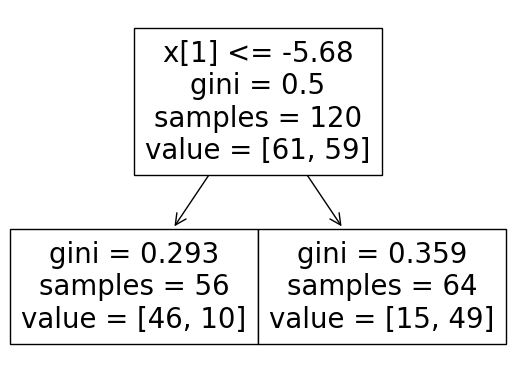

In [ ]:
from sklearn.tree import plot_tree

# N.B: gini is a type of entropy
plot_tree(gs.best_estimator_)

# Exercise

Answer the following questions.



1.   Describe (analyze) the dataset. For instance, how many features? About the ground truth, how many classes are we aiming to predict?
2.   Create three distinct partitions: training, validation, and testing set by utilizing the same proportions of the demonstration. Fix the seed to 1.
3.   Compute the training and validation accuracies for the KNN at the varying of the number of neighbours. Use the following range $ [1, 2, 3, 4, 5, 6, 7] $. Save the results in two distinct variables.  
4.   Compute the training and validation accuracies for the DecisionTree at the varying of the depth. Use the following range $ [1, 2, 3, 4, 5, 6, 7] $. Save the results in two distinct variables.
5.   Use seaborn and plot the 4 curves all together. Analyze the patterns. Who is the best model?
6.   Pick the best model, and predict the accuracy at the testing set.
7. Do the same with a decision tree classifier. This time, use a grid-search CV on depth = $[1, 3, 5, 10]$. Check the testing accuracy, and visualize the tree.



In [ ]:
#for this exercise use this dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']